# Project - 1 Exploratory Data Analysis for Machine Learning

Data source : https://www.kaggle.com/datasets/muhammad4hmed/monkeypox-patients-dataset  

In this notebook, I will clean the data and explore the relationship between the target (Monkey Pox) and predictors. I will also construct new features from the existing data when possible and perform hypothesis tests to see if there is a correlation between the target (Monkey Pox) and predictors.

In [257]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [258]:
data = pd.read_csv('DATA.csv')
data

,Patient_ID,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
0,P0,NaN,False,True,True,True,False,True,False,False,Negative
1,P1,Fever,True,False,True,True,False,False,True,False,Positive
2,P2,Fever,False,True,True,False,False,False,True,False,Positive
3,P3,NaN,True,False,False,False,True,True,True,False,Positive
4,P4,Swollen Lymph Nodes,True,True,True,False,False,True,True,False,Positive
...,...,...,...,...,...,...,...,...,...,...,...
24995,P24995,NaN,True,True,False,True,True,False,False,True,Positive
24996,P24996,Fever,False,True,True,False,True,True,True,True,Positive
24997,P24997,NaN,True,True,False,False,True,True,False,False,Positive
24998,P24998,Swollen Lymph Nodes,False,True,False,True,True,True,False,False,Negative


# 1. Exploratory Data Analysis

In [259]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Patient_ID                      25000 non-null  object
 1   Systemic Illness                18784 non-null  object
 2   Rectal Pain                     25000 non-null  bool  
 3   Sore Throat                     25000 non-null  bool  
 4   Penile Oedema                   25000 non-null  bool  
 5   Oral Lesions                    25000 non-null  bool  
 6   Solitary Lesion                 25000 non-null  bool  
 7   Swollen Tonsils                 25000 non-null  bool  
 8   HIV Infection                   25000 non-null  bool  
 9   Sexually Transmitted Infection  25000 non-null  bool  
 10  MonkeyPox                       25000 non-null  object
dtypes: bool(8), object(3)
memory usage: 781.4+ KB


In [260]:
import textwrap
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)

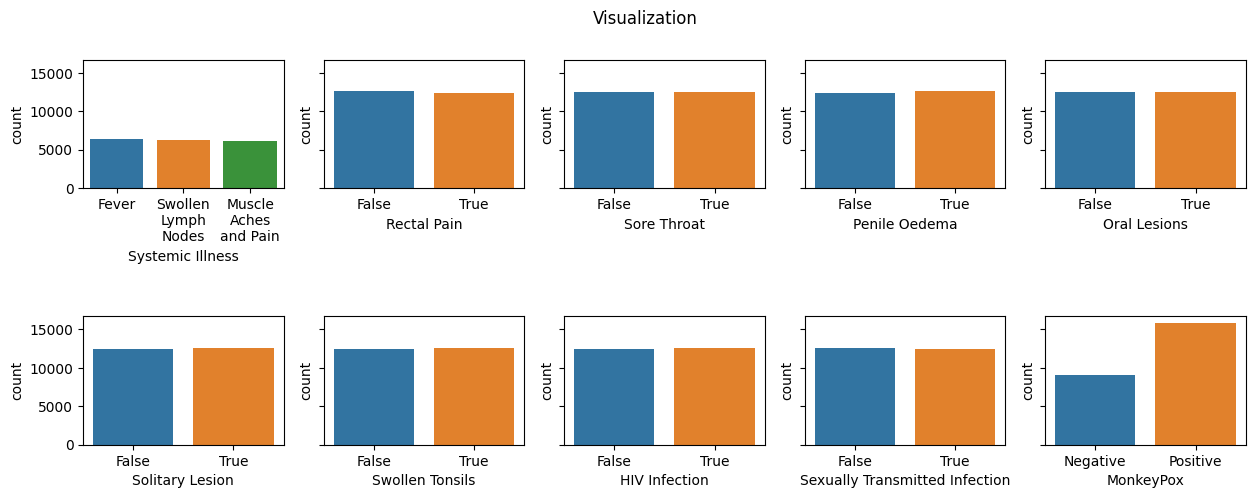

In [261]:
fig, axes = plt.subplots(2,5, sharey=True, figsize=(15,5),)
plt.subplots_adjust(hspace=1)
plt.suptitle('Visualization')

sns.countplot(data=data, x='Systemic Illness', ax=axes[0,0])
sns.countplot(data=data, x='Rectal Pain', ax=axes[0,1])
sns.countplot(data=data, x='Sore Throat', ax=axes[0,2])
sns.countplot(data=data, x='Penile Oedema', ax=axes[0,3])
sns.countplot(data=data, x='Oral Lesions', ax=axes[0,4])
sns.countplot(data=data, x='Solitary Lesion', ax=axes[1,0])
sns.countplot(data=data, x='Swollen Tonsils', ax=axes[1,1])
sns.countplot(data=data, x='HIV Infection', ax=axes[1,2])
sns.countplot(data=data, x='Sexually Transmitted Infection', ax=axes[1,3])
sns.countplot(data=data, x='MonkeyPox', ax=axes[1,4])


# Wrap x-axis labels
for ax in axes.flatten():
    labels = [item.get_text() for item in ax.get_xticklabels()]
    ax.set_xticklabels([textwrap.fill(label, 8) for label in labels], rotation=0)


<Axes: >

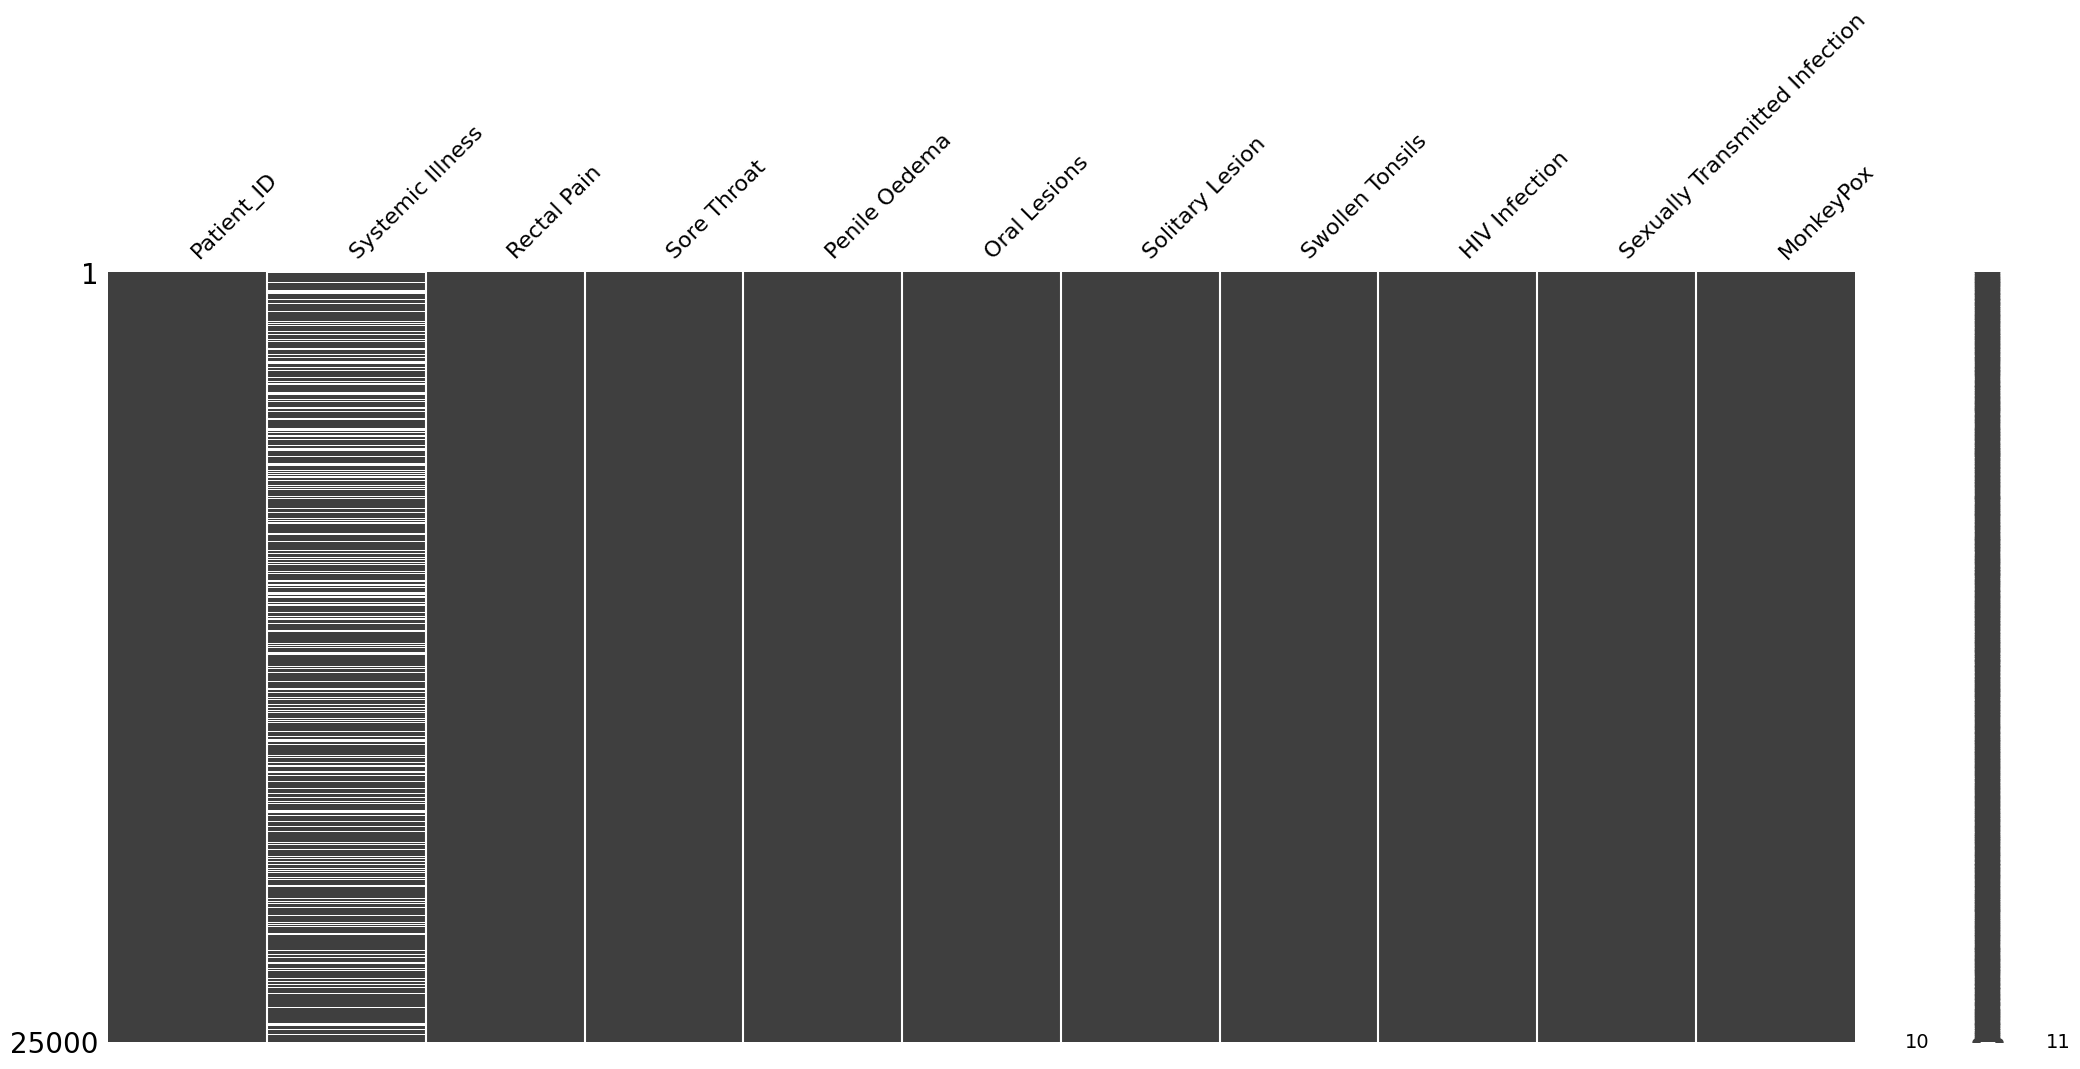

In [262]:
import missingno as msno 
msno.matrix(data)

# 2. Feature Engineering

In [263]:
X = data.drop(['Patient_ID','MonkeyPox'], axis=1)
y = data['MonkeyPox']

In [264]:
X

,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection
0,NaN,False,True,True,True,False,True,False,False
1,Fever,True,False,True,True,False,False,True,False
2,Fever,False,True,True,False,False,False,True,False
3,NaN,True,False,False,False,True,True,True,False
4,Swollen Lymph Nodes,True,True,True,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...
24995,NaN,True,True,False,True,True,False,False,True
24996,Fever,False,True,True,False,True,True,True,True
24997,NaN,True,True,False,False,True,True,False,False
24998,Swollen Lymph Nodes,False,True,False,True,True,True,False,False


Replace value False and True with 0 and 1.

In [265]:
X.replace([False,True], [0,1], inplace=True)

In [266]:
X['Systemic Illness'].value_counts()

Systemic Illness
Fever                    6382
Swollen Lymph Nodes      6252
Muscle Aches and Pain    6150
Name: count, dtype: int64

In [267]:
X['Systemic Illness'] = X['Systemic Illness'].replace(['Muscle Aches and Pain','Swollen Lymph Nodes','Fever'],
                                                      [0,1,2])
X

,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection
0,NaN,0,1,1,1,0,1,0,0
1,2.0,1,0,1,1,0,0,1,0
2,2.0,0,1,1,0,0,0,1,0
3,NaN,1,0,0,0,1,1,1,0
4,1.0,1,1,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...
24995,NaN,1,1,0,1,1,0,0,1
24996,2.0,0,1,1,0,1,1,1,1
24997,NaN,1,1,0,0,1,1,0,0
24998,1.0,0,1,0,1,1,1,0,0


Using KNN Imputer

In [268]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=1)

X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=imputer.get_feature_names_out())
X_imputed

,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection
0,2.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0
1,2.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2,2.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
4,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
24995,2.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
24996,2.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
24997,2.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
24998,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0


In [269]:
X_imputed['Systemic Illness'].value_counts()

Systemic Illness
1.0    8531
2.0    8429
0.0    8040
Name: count, dtype: int64

In [272]:
y=y.replace(['Negative','Positive'],
          [0,1])
y

0        0
1        1
2        1
3        1
4        1
        ..
24995    1
24996    1
24997    1
24998    0
24999    1
Name: MonkeyPox, Length: 25000, dtype: int64

# 3. Hypotesis Testing

In [273]:
X.columns

Index(['Systemic Illness', 'Rectal Pain', 'Sore Throat', 'Penile Oedema',
       'Oral Lesions', 'Solitary Lesion', 'Swollen Tonsils', 'HIV Infection',
       'Sexually Transmitted Infection'],
      dtype='object')

We will use Chi-Square test for hypothesis testing.

> #### Hypothesis Test
> $H_0$ : There is no correlation between variable X and variable.  
> $H_1$ : There is correlation between variable X and variable Y  
> #### Significance Value
> $\alpha = 0.05$
> #### Critical Region
> $H_0$ is rejected if $P-Value < \alpha$ or $\chi^2_{\alpha, df} < \tilde{\chi}^2 $  

Reference : https://www.bmj.com/about-bmj/resources-readers/publications/statistics-square-one/8-chi-squared-tests

In [274]:
from scipy.stats import chi2
print('Chi-Squared Critical Value: ',chi2.ppf(0.95, df=1))

Chi-Squared Critical Value:  3.841458820694124


## Variable Systemic Illness

In [275]:
pd.crosstab(X['Systemic Illness'], y)

MonkeyPox,0,1
Systemic Illness,,
0.0,2926,3224
1.0,1671,4581
2.0,1602,4780


In [276]:
from scipy.stats import chi2_contingency

chi2_value, pvalue, df, exp_freq = chi2_contingency(np.array(pd.crosstab(X_imputed['Systemic Illness'], y)))

print('Table of Expected Frequency :\n', exp_freq)
print(f'Chi2 Value : {chi2_value}')
print(f'P-Value : {pvalue}')

Table of Expected Frequency :
 [[2923.6656  5116.3344 ]
 [3102.21284 5428.78716]
 [3065.12156 5363.87844]]
Chi2 Value : 586.8528345986274
P-Value : 3.6857521052139464e-128


## Variable Rectal Pain

In [277]:
from scipy.stats import chi2_contingency

chi2_value, pvalue, df, exp_freq = chi2_contingency(np.array(pd.crosstab(X_imputed['Rectal Pain'], y)))

display(pd.crosstab(X['Rectal Pain'], y))
print('Table of Expected Frequency :\n', exp_freq)
print(f'Chi2 Value : {chi2_value}')
print(f'P-Value : {pvalue}')

MonkeyPox,0,1
Rectal Pain,,
0,5448,7207
1,3643,8702


Table of Expected Frequency :
 [[4601.8642 8053.1358]
 [4489.1358 7855.8642]]
Chi2 Value : 494.51442414581163
P-Value : 1.4843418683896628e-109


## Variable Sore Throat

In [278]:
from scipy.stats import chi2_contingency

chi2_value, pvalue, df, exp_freq = chi2_contingency(np.array(pd.crosstab(X['Sore Throat'], y)))

display(pd.crosstab(X['Sore Throat'], y))
print('Table of Expected Frequency :\n', exp_freq)
print(f'Chi2 Value : {chi2_value}')
print(f'P-Value : {pvalue}')

MonkeyPox,0,1
Sore Throat,,
0,4907,7539
1,4184,8370


Table of Expected Frequency :
 [[4525.86344 7920.13656]
 [4565.13656 7988.86344]]
Chi2 Value : 100.17850932207872
P-Value : 1.3926240122068867e-23


## Variable Penile Oedema

In [279]:
from scipy.stats import chi2_contingency

chi2_value, pvalue, df, exp_freq = chi2_contingency(np.array(pd.crosstab(X['Penile Oedema'], y)))

display(pd.crosstab(X['Penile Oedema'], y))
print('Table of Expected Frequency :\n', exp_freq)
print(f'Chi2 Value : {chi2_value}')
print(f'P-Value : {pvalue}')

MonkeyPox,0,1
Penile Oedema,,
0,4877,7511
1,4214,8398


Table of Expected Frequency :
 [[4504.77232 7883.22768]
 [4586.22768 8025.77232]]
Chi2 Value : 95.54987650703023
P-Value : 1.442118438462757e-22


## Variable Oral Lesions

In [280]:
from scipy.stats import chi2_contingency

chi2_value, pvalue, df, exp_freq = chi2_contingency(np.array(pd.crosstab(X['Oral Lesions'], y)))

display(pd.crosstab(X['Oral Lesions'], y))
print('Table of Expected Frequency :\n', exp_freq)
print(f'Chi2 Value : {chi2_value}')
print(f'P-Value : {pvalue}')

MonkeyPox,0,1
Oral Lesions,,
0,4863,7651
1,4228,8258


Table of Expected Frequency :
 [[4550.59096 7963.40904]
 [4540.40904 7945.59096]]
Chi2 Value : 67.26697985273577
P-Value : 2.3711975473141775e-16


## Variable Solitary Lesion

In [281]:
from scipy.stats import chi2_contingency

chi2_value, pvalue, df, exp_freq = chi2_contingency(np.array(pd.crosstab(X['Solitary Lesion'], y)))

display(pd.crosstab(X['Solitary Lesion'], y))
print('Table of Expected Frequency :\n', exp_freq)
print(f'Chi2 Value : {chi2_value}')
print(f'P-Value : {pvalue}')

MonkeyPox,0,1
Solitary Lesion,,
0,4761,7712
1,4330,8197


Table of Expected Frequency :
 [[4535.68172 7937.31828]
 [4555.31828 7971.68172]]
Chi2 Value : 34.94706665962249
P-Value : 3.38791411460228e-09


## Variable Solitary Lesion

In [282]:
from scipy.stats import chi2_contingency

chi2_value, pvalue, df, exp_freq = chi2_contingency(np.array(pd.crosstab(X['Solitary Lesion'], y)))

display(pd.crosstab(X['Solitary Lesion'], y))
print('Table of Expected Frequency :\n', exp_freq)
print(f'Chi2 Value : {chi2_value}')
print(f'P-Value : {pvalue}')

MonkeyPox,0,1
Solitary Lesion,,
0,4761,7712
1,4330,8197


Table of Expected Frequency :
 [[4535.68172 7937.31828]
 [4555.31828 7971.68172]]
Chi2 Value : 34.94706665962249
P-Value : 3.38791411460228e-09


## Variable Swollen Tonsils

In [283]:
from scipy.stats import chi2_contingency

chi2_value, pvalue, df, exp_freq = chi2_contingency(np.array(pd.crosstab(X['Swollen Tonsils'], y)))

display(pd.crosstab(X['Swollen Tonsils'], y))
print('Table of Expected Frequency :\n', exp_freq)
print(f'Chi2 Value : {chi2_value}')
print(f'P-Value : {pvalue}')

MonkeyPox,0,1
Swollen Tonsils,,
0,4613,7854
1,4478,8055


Table of Expected Frequency :
 [[4533.49988 7933.50012]
 [4557.50012 7975.49988]]
Chi2 Value : 4.315230405742069
P-Value : 0.037772655452152144


## Variable HIV Infection

In [284]:
from scipy.stats import chi2_contingency

chi2_value, pvalue, df, exp_freq = chi2_contingency(np.array(pd.crosstab(X['HIV Infection'], y)))

display(pd.crosstab(X['HIV Infection'], y))
print('Table of Expected Frequency :\n', exp_freq)
print(f'Chi2 Value : {chi2_value}')
print(f'P-Value : {pvalue}')

MonkeyPox,0,1
HIV Infection,,
0,5394,7022
1,3697,8887


Table of Expected Frequency :
 [[4514.95424 7901.04576]
 [4576.04576 8007.95424]]
Chi2 Value : 533.6958762438375
P-Value : 4.435025614165891e-118


## Variable Sexually Transmitted Infection

In [285]:
from scipy.stats import chi2_contingency

chi2_value, pvalue, df, exp_freq = chi2_contingency(np.array(pd.crosstab(X['Sexually Transmitted Infection'], y)))

display(pd.crosstab(X['Sexually Transmitted Infection'], y))
print('Table of Expected Frequency :\n', exp_freq)
print(f'Chi2 Value : {chi2_value}')
print(f'P-Value : {pvalue}')

MonkeyPox,0,1
Sexually Transmitted Infection,,
0,5307,7247
1,3784,8662


Table of Expected Frequency :
 [[4565.13656 7988.86344]
 [4525.86344 7920.13656]]
Chi2 Value : 380.028262287027
P-Value : 1.2268969903563724e-84


Conclusion:  
It seems that all variable independent (X) is rejected the $H_0$, so there is correlation between variable X and variable Y

In [288]:
from scipy.stats import chi2_contingency

pvalue_list = [chi2_contingency(np.array(pd.crosstab(X[cols], y)))[1] for cols in X_imputed.columns]
chi2_list = [chi2_contingency(np.array(pd.crosstab(X[cols], y)))[0] for cols in X_imputed.columns]

result = pd.DataFrame({'Variable' : X_imputed.columns,
                       'P-Value' : pvalue_list,
                       'Chi2 Value' : chi2_list})
result

,Variable,P-Value,Chi2 Value
0,Systemic Illness,2.497236e-192,882.362306
1,Rectal Pain,1.484342e-109,494.514424
2,Sore Throat,1.392624e-23,100.178509
3,Penile Oedema,1.442118e-22,95.549877
4,Oral Lesions,2.371198e-16,67.266980
5,Solitary Lesion,3.387914e-09,34.947067
6,Swollen Tonsils,3.777266e-02,4.315230
7,HIV Infection,4.435026e-118,533.695876
8,Sexually Transmitted Infection,1.226897e-84,380.028262
